In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn .metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [53]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [54]:
glass_data.shape

(214, 10)

In [55]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [56]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [57]:
glass_data.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [58]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [59]:
glass_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [60]:
glass_data[glass_data.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [61]:
df = glass_data.drop_duplicates()

In [62]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [63]:
DF= df.iloc[:,0:9]
DF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


<AxesSubplot:>

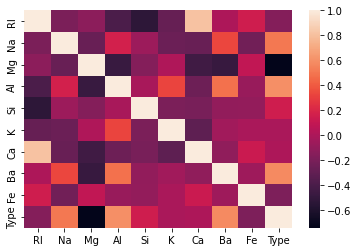

In [64]:
cor = df.corr()
sns.heatmap(cor)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [67]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [68]:
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features


array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [69]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [70]:
#As per the heatmap Ca and K are almost lying in 0 s0 we have to remove Ca and K
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45)

In [71]:
X_train

,RI,Na,Mg,Al,Si,Ba,Fe
185,0.010659,1.124177,0.403249,1.557355,-1.819617,2.925383,-0.588301
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,3.086325,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,2.945501,-0.588301
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,-0.353808,-0.588301
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,-0.353808,0.541526
...,...,...,...,...,...,...,...
32,-0.197547,-0.680073,0.555995,-0.443617,0.407845,-0.172748,1.671354
124,0.123025,-0.581882,0.680969,0.223374,-0.187871,-0.353808,0.644238
131,-0.071962,0.031808,0.903145,-0.544676,-0.213772,-0.353808,-0.588301
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,-0.353808,0.336103


In [72]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [73]:
knn=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.88      0.75      0.81        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.49      0.47      0.47        64
weighted avg       0.69      0.69      0.68        64



In [74]:
accuracy_score(y_test,y_pred)

0.6875

In [75]:
knn=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        19
           2       0.79      0.79      0.79        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.39      0.39      0.39        64
weighted avg       0.66      0.69      0.66        64



In [76]:
accuracy_score(y_test,y_pred)

0.6875

In [77]:
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.52      0.84      0.64        19
           2       0.86      0.68      0.76        28
           3       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.66        64
   macro avg       0.48      0.46      0.45        64
weighted avg       0.67      0.66      0.65        64



In [78]:
accuracy_score(y_test,y_pred)

0.65625

In [79]:
k_range = range(1,25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    

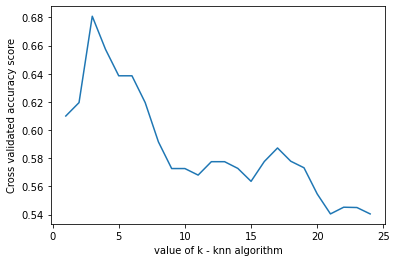

In [80]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()